## Посмотрим

In [3]:
import os
import sys

import IPython
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append("../src")

from config import DATA_DIR, SEED

np.random.seed(SEED)

In [4]:
def load_files(folder_path):
    variables = {}

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        if file_name.endswith(".csv"):
            var_name = os.path.splitext(file_name)[0]
            variables[var_name] = pd.read_csv(file_path)
            print(f"{var_name} downloaded")

    return variables

In [5]:
data = load_files(os.path.join(DATA_DIR, "raw"))

test downloaded
train downloaded


In [20]:
data["train"].head()

,id,message
0,1.opus,03ЩУЫЛПИГХ
1,2.opus,ЪЛТ0ДС6А3Г
2,3.opus,5ЭКЫБЗХЯН
3,4.opus,ЖЫЦОИ68КФ
4,5.opus,32Ю7МЫ ЗЛ


Посмотрим какой длины могут быть закодированные сообщения

In [16]:
pd.Series((len(x) for x in data["train"].message)).describe()

count    30000.000000
mean         8.916833
std          1.561793
min          4.000000
25%          8.000000
50%          9.000000
75%         10.000000
max         14.000000
dtype: float64

Длительность самих записей

In [ ]:
durations_train = pd.Series(
    [
        librosa.get_duration(path=os.path.join(DATA_DIR, "raw", "morse_dataset", path))
        for path in data["train"]["id"]
    ],
    name="durations_train",
)
durations_test = pd.Series(
    [
        librosa.get_duration(path=os.path.join(DATA_DIR, "raw", "morse_dataset", path))
        for path in data["test"]["id"]
    ],
    name="durations_test",
)

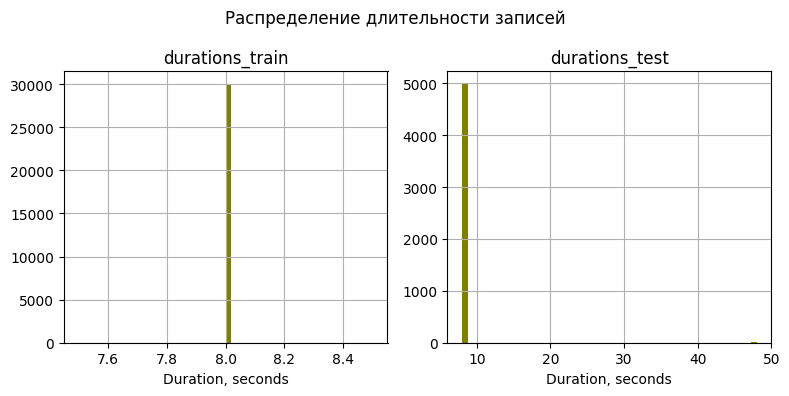

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.suptitle("Распределение длительности записей")
fig.set_figheight(4)
fig.set_figwidth(8)

for i, dur in enumerate([durations_train, durations_test]):
    ax = axs[i]
    ax.hist(dur, bins=50, color="olive")
    ax.set_xlabel("Duration, seconds")
    ax.set_title(dur.name)
    ax.grid(True)

fig.tight_layout()

In [ ]:
sample = np.random.randint(low=0, high=30000, size=3)
sample_train = data["train"]["id"][sample]
sound_exmpls = {}

for i in sample_train:
    sound_exmpls[i[:-5]], sr = librosa.load(
        os.path.join(DATA_DIR, "raw", "morse_dataset", i)  # , sr=16000
    )
    print(i, "sr =", sr)
    display(IPython.display.Audio(sound_exmpls[i[:-5]], rate=sr))

15152.opus sr = 22050


15932.opus sr = 22050


19367.opus sr = 22050


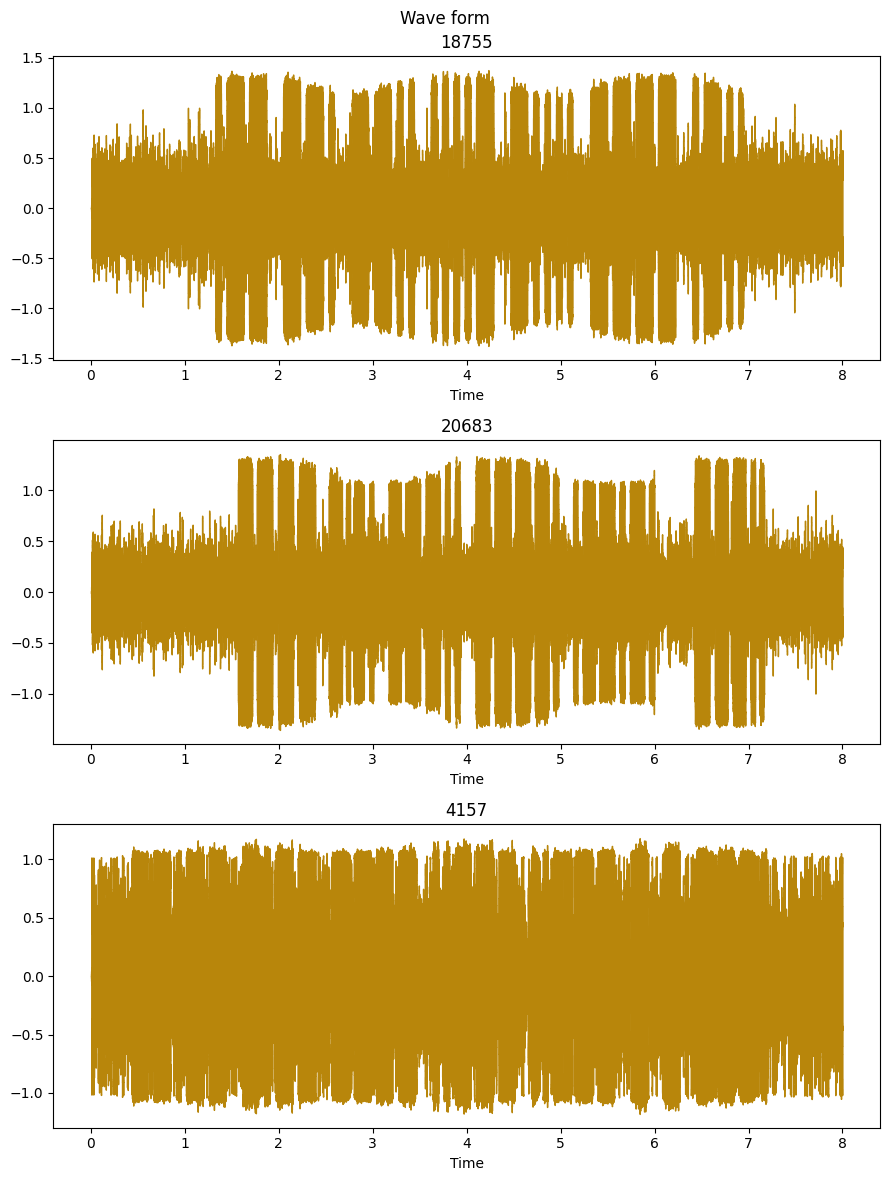

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(9, 12))
fig.suptitle("Wave form")
i = 0

for key, value in sound_exmpls.items():
    ax = axs[i]
    ld.waveshow(value, sr=sr, ax=ax, color="darkgoldenrod")
    ax.set_title(key)
    i += 1

fig.tight_layout()
plt.show()

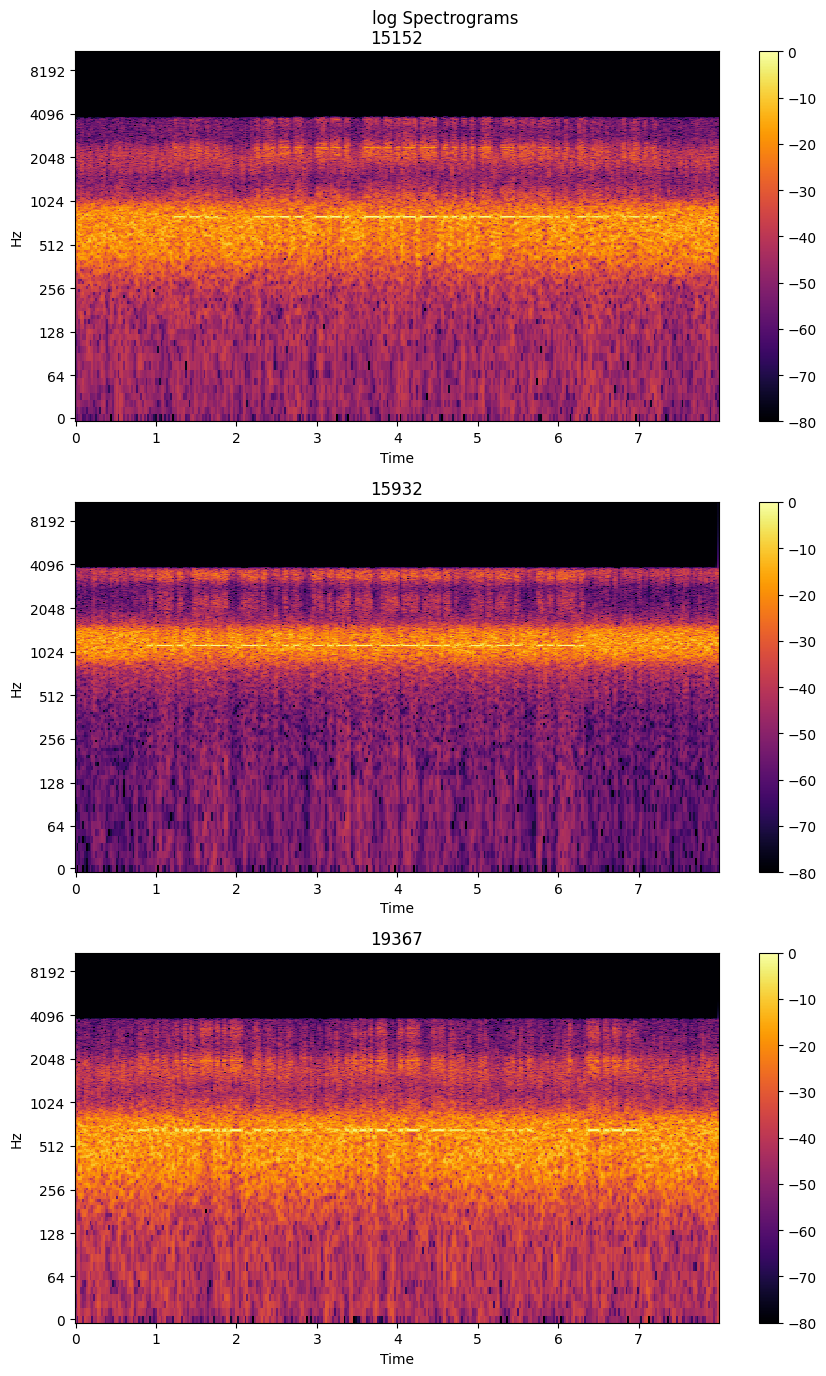

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(9, 14))
fig.suptitle("log Spectrograms")
cmap = "inferno"

for i, (key, value) in enumerate(sound_exmpls.items()):
    ax = axs[i]

    D = np.abs(librosa.stft(value))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    img = librosa.display.specshow(
        DB, sr=sr, x_axis="time", y_axis="log", ax=ax, cmap=cmap
    )
    fig.colorbar(img, ax=ax)
    ax.set_title(key)

fig.tight_layout()
plt.show()

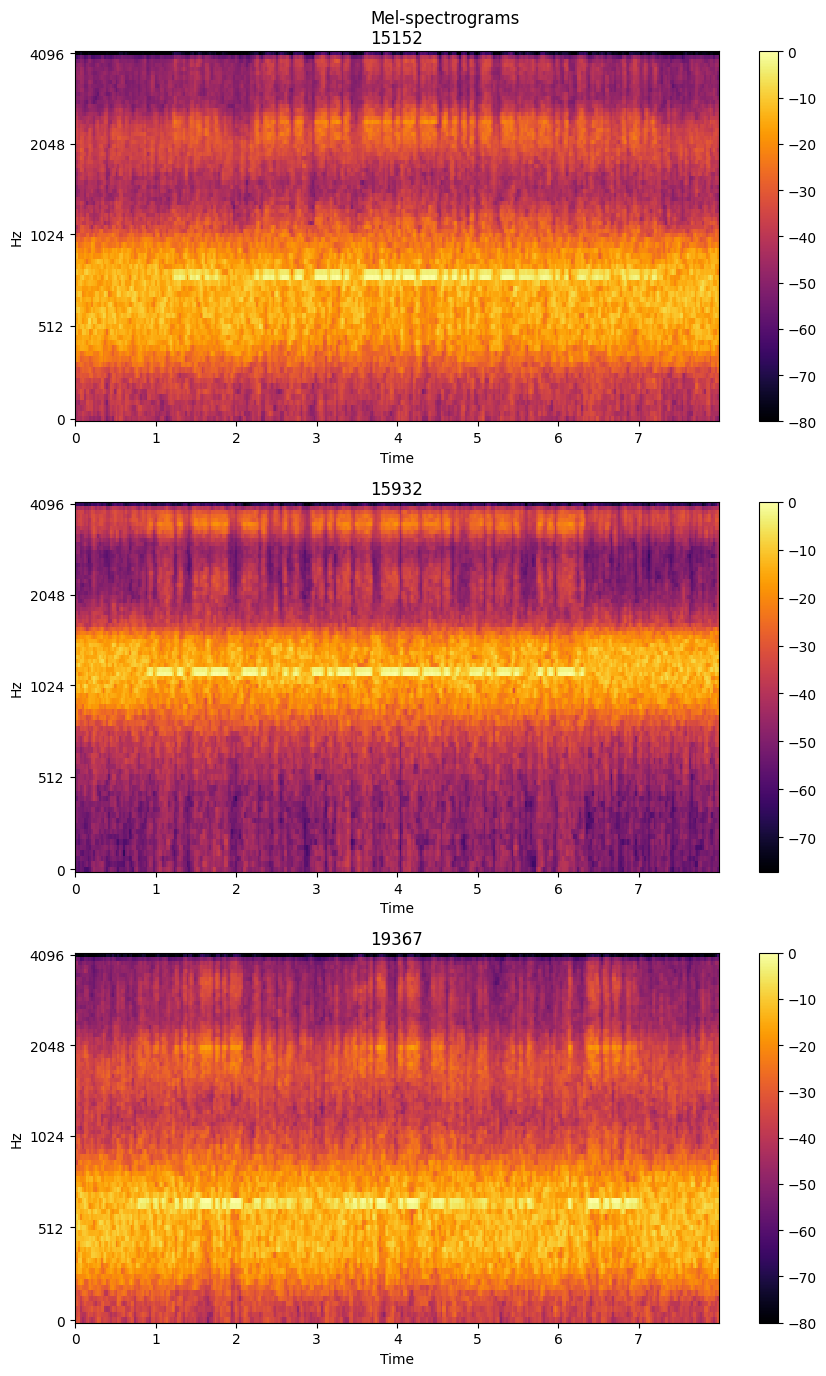

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(9, 14))
fig.suptitle("Mel-spectrograms")
cmap = "inferno"

for i, (key, value) in enumerate(sound_exmpls.items()):
    ax = axs[i]

    S = librosa.feature.melspectrogram(y=value, sr=sr, n_mels=80, fmax=4096)
    S_dB = librosa.power_to_db(S, ref=np.max)

    img = ld.specshow(
        S_dB, sr=sr, x_axis="time", y_axis="mel", ax=ax, fmax=4096, cmap=cmap
    )
    fig.colorbar(img, ax=ax)
    ax.set_title(key)

fig.tight_layout()
plt.show()

In [22]:
ex = sound_exmpls["15152"]

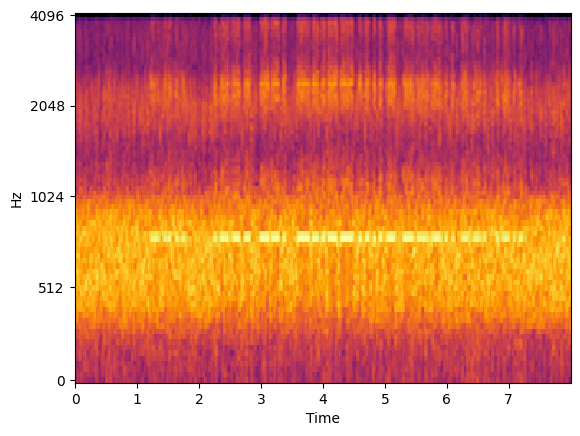

In [ ]:
S = librosa.feature.melspectrogram(y=ex, sr=sr, n_mels=80, fmax=4096, fmin=0)
S_dB = librosa.power_to_db(S, ref=np.max)

ld.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel", fmax=4096, cmap=cmap);

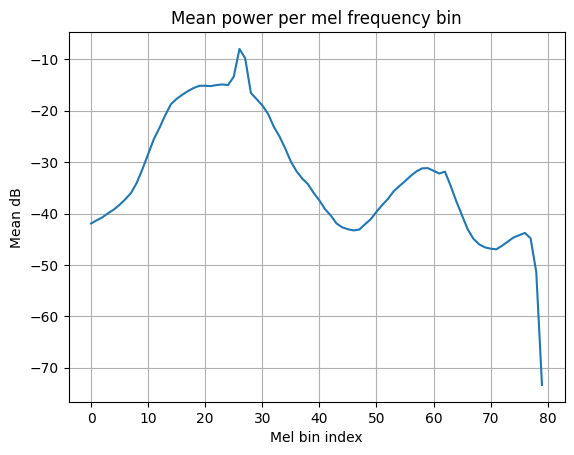

In [44]:
import torchaudio
import librosa
import matplotlib.pyplot as plt
import numpy as np


mel = librosa.feature.melspectrogram(y=ex, sr=sr, n_mels=80, fmin=0, fmax=4096)
db_mel = librosa.power_to_db(mel, ref=np.max)

mean_power_per_freq = db_mel.mean(axis=1)  # shape: [n_mels]

plt.plot(mean_power_per_freq)
plt.title("Mean power per mel frequency bin")
plt.xlabel("Mel bin index")
plt.ylabel("Mean dB")
plt.grid()
plt.show()

In [45]:
np.argmax(mean_power_per_freq)

np.int64(26)

In [ ]:
mel_frequencies = librosa.mel_frequencies(n_mels=80, fmin=0, fmax=4096)
print(mel_frequencies[30])

898.9549128139255


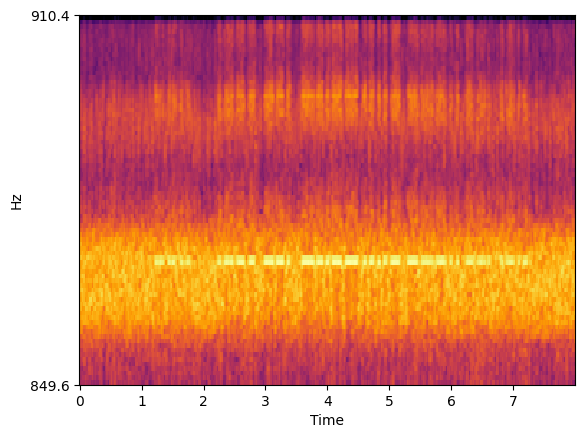

In [50]:
S = librosa.feature.melspectrogram(y=ex, sr=sr, n_mels=80, fmax=4096, fmin=0)
S_dB = librosa.power_to_db(S, ref=np.max)

ld.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel", fmin=850, fmax=910, cmap=cmap);